# The Sparks Foundation

## Prediction Using Supervised Learning

### Predict the percentage of an student based on the no. of study hours.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sn
%matplotlib inline
print('Succesfully imported')

Succesfully imported


In [2]:
URL="http://bit.ly/w-data"
student_data=pd.read_csv(URL)
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


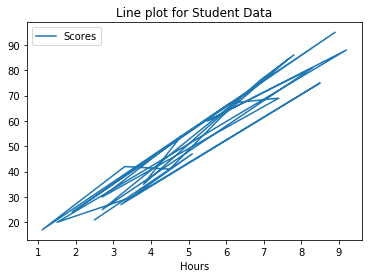

In [5]:
student_data.plot(kind="line",x="Hours",y="Scores")
plt.title("Line plot for Student Data")
plt.show()

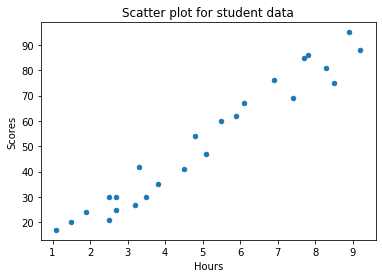

In [6]:
student_data.plot(kind="scatter",x="Hours",y="Scores")
plt.title("Scatter plot for student data")
plt.show()

In [7]:
X=student_data.iloc[:,:-1].values
Y=student_data.iloc[:,1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

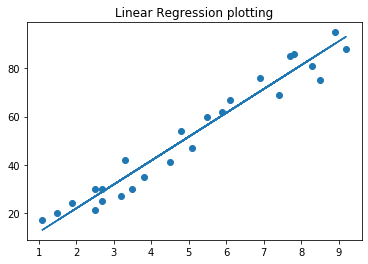

In [10]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(x=X,y=Y)
plt.plot(X,line)
plt.title("Linear Regression plotting")
plt.show()

In [11]:
y_pred=regressor.predict(X_test)

pred_df=pd.DataFrame({"Hours":X_test.reshape(-1,),"Actual Score":y_test,"Prediction":y_pred})
pred_df

,Hours,Actual Score,Prediction
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


### Evaluation

In [12]:
#putting our own data set
hour=[[9.50],[3.56],[5.90],[7.42],[8.30]]
own_pred=regressor.predict(hour)
newDF=pd.DataFrame({"Hours":[9.50,3.56,5.90,7.42,8.30],"Predicted Score":own_pred})
newDF

,Hours,Predicted Score
0,9.50,96.169397
1,3.56,37.300097
2,5.90,60.491033
3,7.42,75.555231
4,8.30,84.276609


In [13]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [14]:
print("R2 Score :",metrics.r2_score(y_test,y_pred))

R2 Score : 0.9454906892105356
